In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from source.tserie import TSerie
from source.featlearn.tdr import TDR
from source.torch_utils import getContrastiveFeatures
from source.read_ontario import read_ontario
from source.read_india import read_india
from source.read_brasil import read_brasil
from source.utils import commonWindows
from cuml.manifold import UMAP
from source.featlearn.autoencoder_lr import AutoencoderFL
import sys

sys.path.append('/home/texs/Documentos/Repositories/ts2vec')
from ts2vec import TS2Vec
# from cuml.manifold import UMAP

N_VIZ_SAMPLES = 600
VIS_PATH = 'visualizations'
SMOOTH = 8 # 8 -1 if you don't want to smooth the data otherwise the size of the smooth window
MODE = 'shape' # subsequences - shape
EPOCHS = 40
POLLUTANTS = ['O3', 'PM25'] # ['NO', 'NOx', 'NO2', 'SO2', 'CO', 'O3', 'PM25']
UMAP_NEIGHBORS = 15



/home/texs/anaconda3/envs/clearn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
windows_map = read_ontario(granularity='years', cache=True)

windows, dates, station_ids, stations = commonWindows(windows_map, POLLUTANTS)

In [3]:
# windows.shape

In [6]:
cae = AutoencoderFL(windows.shape[2], windows.shape[1], feature_size=40)

In [8]:

# X = np.transpose(windows, [0, 2, 1])
# X = windows
mts = TSerie(X=windows, y =None)
# mts.smooth(8)
mts.minMaxNormalizization()
mts.smooth(50)

Loaded mts - N: 380, T: 365, D: 2 
(380, 2, 365)


In [9]:
X = mts.X
X.shape

(380, 365, 2)

In [25]:
cae.fit(X, epochs=1000, batch_size=320)

Epoch[1] Train loss    avg: 0.00027760714874602854
Epoch[4] Train loss    avg: 0.0005035321664763615
Epoch[8] Train loss    avg: 0.0002947584871435538
Epoch[12] Train loss    avg: 0.00021688070410164073
Epoch[16] Train loss    avg: 0.0002461820185999386
Epoch[20] Train loss    avg: 0.00027329326258040965
Epoch[24] Train loss    avg: 0.0003031510641449131
Epoch[28] Train loss    avg: 0.00024810974719002843
Epoch[32] Train loss    avg: 0.00027951784431934357
Epoch[36] Train loss    avg: 0.00019556573533918709
Epoch[40] Train loss    avg: 0.00020559684344334528
Epoch[44] Train loss    avg: 0.0001952072125277482
Epoch[48] Train loss    avg: 0.0001792845650925301
Epoch[52] Train loss    avg: 0.000176652982190717
Epoch[56] Train loss    avg: 0.0001835822477005422
Epoch[60] Train loss    avg: 0.00018490199727239087
Epoch[64] Train loss    avg: 0.00019734984380193055
Epoch[68] Train loss    avg: 0.00019156393682351336
Epoch[72] Train loss    avg: 0.000197128982108552
Epoch[76] Train loss    av

In [26]:
X_out, features = cae.encode(X)

In [27]:
features.shape

(380, 40)

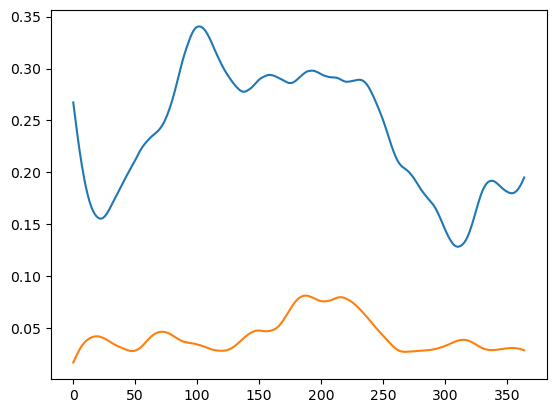

In [32]:
import matplotlib.pyplot as plt
test = 4
# plt.plot(X[test])
plt.plot(mts.X[test])

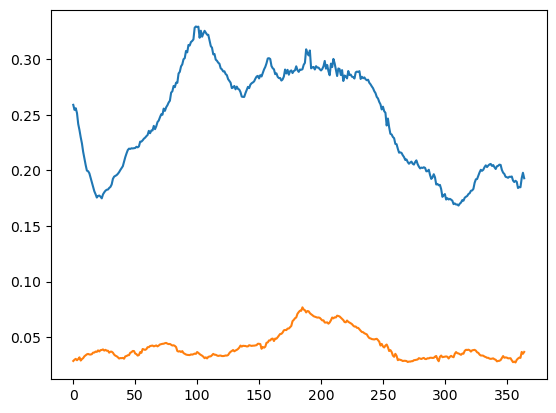

In [33]:
plt.plot(X_out[test])

In [ ]:
# from sklearn.decomposition import PCA
# class TS2VecModel:
#     def __init__(self, output_dims):
#         self.output_dims = output_dims
    
#     def fit_transform(self, X, n_epochs):
#         N, T, D = X.shape
#         self.Drepr = np.zeros([N, D, self.output_dims])
#         self.Trepr = np.zeros([N, D, T, self.output_dims])
#         for i in range(D):
#             model = TS2Vec(
#                 input_dims=1,
#                 device=0,
#                 output_dims=self.output_dims,
                
#             )
#             Xi = np.expand_dims(X[:, :, i], axis=2)
#             model.fit(Xi, verbose=True,n_epochs = n_epochs)
#             self.Drepr[:, i, :] =  model.encode(Xi, encoding_window='full_series')
#             self.Trepr[:, i, :, :] = model.encode(Xi)
            
#         self.Dvals = np.zeros([N, D])
#         # self.Tvals = np.zeros([N, D])
#         for i in range(D):
#             reducer = PCA(n_components=1)
#             self.Dvals[:, i] =reducer.fit_transform(self.Drepr[:, i, :]).flatten()
            
#         return self.Drepr.reshape([N, D * self.output_dims])



In [ ]:
# model = TS2VecModel(4)
# mts.features = model.fit_transform(mts.X, n_epochs = 10)

In [ ]:
features.shape

(380, 16)

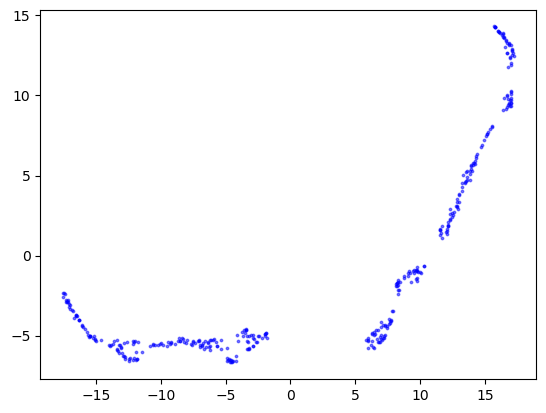

In [ ]:
import matplotlib.pyplot as plt

reducer = UMAP(n_components=2, n_epochs=4000)
reducer.fit(features)
coords = reducer.transform(features)
# min_r = 10
# max_r = 80
# magnitudes = mts.magnitudes[:, 0]
# point_radius = ((magnitudes + magnitudes.min()) / (magnitudes.max() - magnitudes.min()) ) * (max_r - min_r) + min_r

# plt.scatter(coords[:, 0], coords[:, 1], s = point_radius, color="blue", alpha=0.5)
plt.scatter(coords[:, 0], coords[:, 1], s = 3, color="blue", alpha=0.5)



In [ ]:
# from sklearn.cluster import KMeans
# n_clusters = 5
# kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(coords)

# classes = kmeans.labels_
# # clusters = np.unique(kmeans.labels_)s

# # clusterLabels = 

# plt.scatter(coords[:, 0], coords[:, 1], s = point_radius, c = classes, alpha=0.5)


In [ ]:
# from ccpca import CCPCA

# groups = np.unique(classes)
# group_ids = classes

# fcs = []


# for target in groups:

#     ccpca = CCPCA(n_components=1)
#     # target = 2012
#     ccpca.fit(
#         model.Dvals[group_ids==target],
#         model.Dvals[group_ids!=target],
#         var_thres_ratio=0.5,
#         n_alphas=40,
#         max_log_alpha=0.5,
#     )


#     coords2 = ccpca.transform(model.Dvals[group_ids==target])
#     # coords2 = ccpca.transform(dfeatures[year_ids!=2011])
#     # coords2 = ccpca.transform(dfeatures)
#     best_alpha = ccpca.get_best_alpha()
#     cpca_fcs = ccpca.get_feat_contribs()
#     fcs.append(cpca_fcs)
#     # print(cpca_fcs)
#     # print(best_alpha)
#     # plt.scatter(coords2[:, 0], coords2[:, 1])
# # print(len(fcs))
# # print(fcs[0].shape)


In [ ]:
# fcs = np.array(fcs)
# plt.bar(np.array([i for i in range (n_clusters)]), fcs[:, 0])

In [ ]:
# plt.bar(np.array([i for i in range (n_clusters)]), fcs[:, 1])

In [ ]:
# item1 = 2
# item2 = 3
# print(year_ids[item2])
# fcs = np.array(fcs)

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# X = np.array([i for i in range (2)])
# # for i in range(28):
# ax.bar(X + 0.00, fcs[item1], color = 'g', width = 0.25)
# ax.bar(X + 0.25, fcs[item2], color = 'r', width = 0.25)
# # ax.bar(X + 0.50, fcs[:,2], color = 'r', width = 0.25)
# # plt.bar(, fcs[:,0])

In [ ]:
# from server.source.storage import MTSStorage

# storage = MTSStorage(os.path.join(VIS_PATH ,'ts2vec.npy'))    
# # storage.delete()
# storage.load()

# dimensions = POLLUTANTS
# data = np.concatenate([mts.X_orig, mts.X], axis=2) 
# storage.add_mts(
#     '_'.join(POLLUTANTS) , data , 
#     dimensions = dimensions + [dim+ '_norm' for dim in dimensions], 
#     labels = {'station': station_ids, 'months': month_ids, 'years': year_ids}, 
#     labelsNames={'station': stations_map, 'months': months_map, 'years': years_map}, 
#     coords = {
#         'coords': coords,
#     },
#     sampling=True,
#     n_samples= N_VIZ_SAMPLES
# )

# storage.save()